In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

C:\Users\CHAKRI\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# 2. Load Dataset
df = pd.read_csv('adult_3.csv')

# Preview dataset
print("\nDataset Preview:")
print(df.head())


Dataset Preview:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week na

In [3]:
# 2.5 Check for Null Values
print("\nChecking for Null Values:")
print(df.isnull().sum())

# Optionally handle nulls
df = df.dropna()


Checking for Null Values:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [4]:
# 3. Encode Categorical Variables
cat_cols = df.select_dtypes(include='object').columns
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

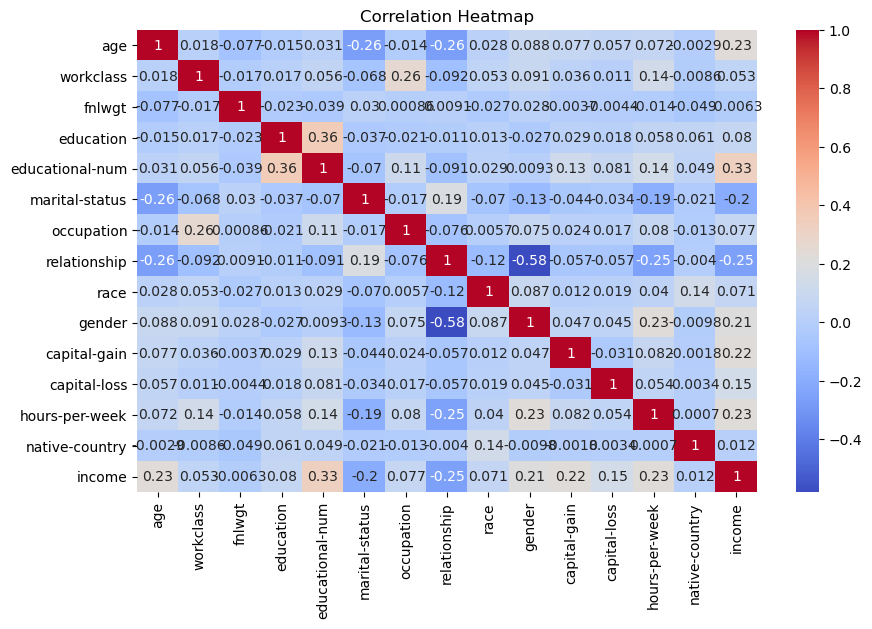

In [5]:
# 4. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# 5. Prepare Features and Target
# Automatically detect last column as target if not known
target_col = df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# 6. Train Classification Models
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [8]:
# 7. Evaluation
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8272085167366158
Random Forest Accuracy: 0.8641621455624936

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



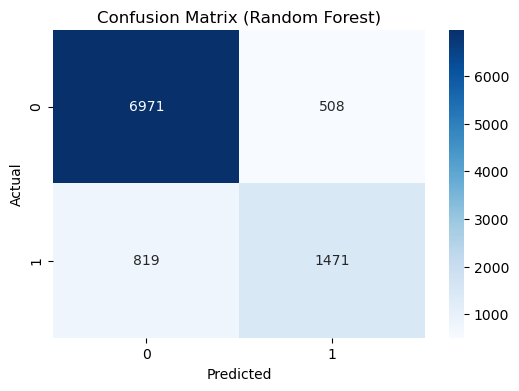

In [9]:
# 8. Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

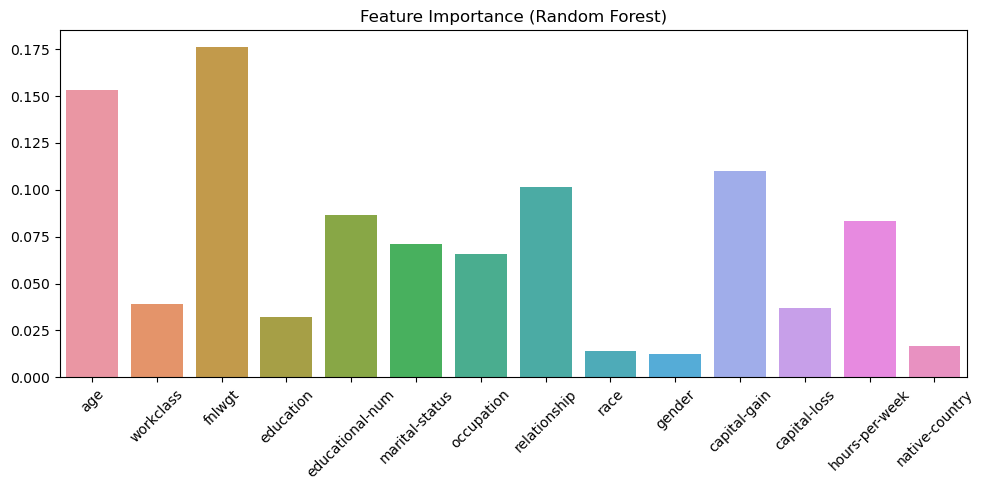

In [10]:
# 9. Feature Importance
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance (Random Forest)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Boxplot for age before:


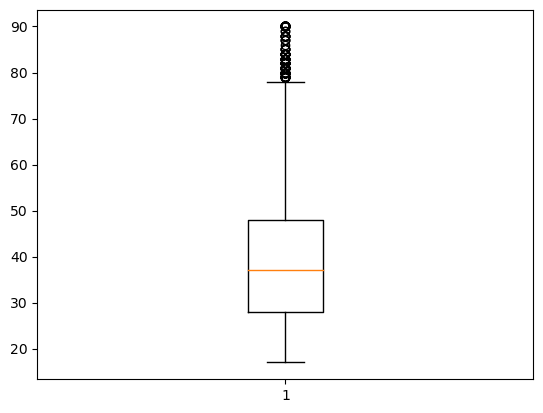

Boxplot for age after condition:


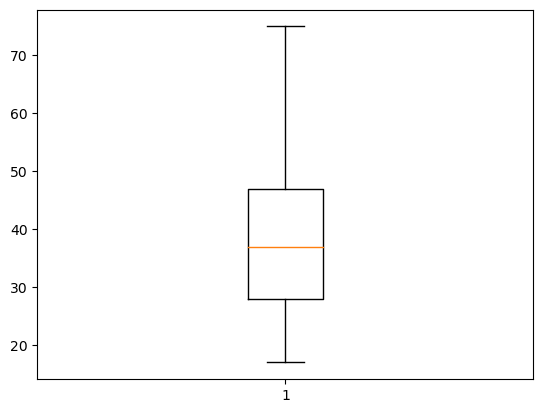

In [11]:
#10.Boxplot for age
print("Boxplot for age before:")
plt.boxplot(df['age'])
plt.show()
df=df[(df['age']<=75)&(df['age']>=17)]
print("Boxplot for age after condition:")
plt.boxplot(df['age'])
plt.show()

In [12]:
# 11. Predict for New Input
def predict_custom_classification(input_dict):
    try:
        for col in input_dict:
            if col in encoders:
                input_dict[col] = encoders[col].transform([input_dict[col]])[0]
        df_input = pd.DataFrame([input_dict])
        df_input_scaled = scaler.transform(df_input)
        pred = rf.predict(df_input_scaled)[0]
        return pred
    except Exception as e:
        return f"Prediction error: {e}"

In [13]:
# 12. Example Prediction
print("\nPrediction for New Sample:")
example_input = {
    col: df[col].iloc[0] if col not in encoders else encoders[col].inverse_transform([df[col].iloc[0]])[0]
    for col in df.columns if col != target_col
}
print("Sample Input:", example_input)
predicted = predict_custom_classification(example_input)

# Decode output if needed
if target_col in encoders:
    predicted_label = encoders[target_col].inverse_transform([predicted])[0]
    print("Predicted Class Label:", predicted_label)
else:
    print("Predicted Class (Encoded):", predicted)


Prediction for New Sample:
Sample Input: {'age': 25, 'workclass': 'Private', 'fnlwgt': 226802, 'education': '11th', 'educational-num': 7, 'marital-status': 'Never-married', 'occupation': 'Machine-op-inspct', 'relationship': 'Own-child', 'race': 'Black', 'gender': 'Male', 'capital-gain': 0, 'capital-loss': 0, 'hours-per-week': 40, 'native-country': 'United-States'}
Predicted Class Label: <=50K
